In [20]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import time
import re
import requests
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

pd.options.display.max_columns=999

import warnings
warnings.filterwarnings('ignore')

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [438]:
country_names_df = pd.read_csv('Country_Name_Matching.csv')
country_names = {}
for i in range(len(country_names_df)):
    country_names[country_names_df['Abbrev'][i]] = country_names_df['Full'][i]
country_names

{'FRA': 'France',
 'ENG': 'England',
 'ESP': 'Spain',
 'ITA': 'Italy',
 'GER': 'Germany',
 'NED': 'Netherlands',
 'USA': 'United States',
 'POR': 'Portugal',
 'BRA': 'Brazil',
 'SEN': 'Senegal',
 'BEL': 'Belgium',
 'GHA': 'Ghana',
 'CIV': "Cote d'Ivoire",
 'SWE': 'Sweden',
 'MLI': 'Mali',
 'SRB': 'Serbia',
 'ARG': 'Argentina',
 'DEN': 'Denmark',
 'NOR': 'Norway',
 'NGA': 'Nigeria',
 'CAN': 'Canada',
 'URU': 'Uruguay',
 'CHI': 'Chile',
 'ECU': 'Ecuador',
 'COL': 'Columbia',
 'MEX': 'Mexico',
 'AUT': 'Austria',
 'CRO': 'Croatia',
 'SCO': 'Scotland',
 'KOR': 'Korea',
 'BFA': 'Burkina Faso',
 'POL': 'Poland',
 'ALB': 'Albania',
 'MAR': 'Morocco',
 'CMR': 'Cameroon',
 'JPN': 'Japan',
 'TUR': 'Turkey',
 'WAL': 'Wales',
 'IRL': 'Ireland',
 'HUN': 'Hungary',
 'LUX': 'Luxembourg',
 'MKD': 'Macedonia',
 'SUI': 'Switzerland',
 'BUL': 'Bulgaria',
 'ALG': 'Algeria',
 'GUI': 'Guinea',
 'GEO': 'Georgia',
 'EGY': 'Egypt',
 'SLE': 'Sierra Leone',
 'CZE': 'Czech Republic',
 'GAM': 'Gambia'}

In [86]:
team_names = pd.read_csv('TeamNameConventions.csv')
team_names

,League,Five38,FBRef,FBRef_URL
0,MLS,Atlanta United FC,Atlanta Utd,https://fbref.com/en/squads/1ebc1a5b/Atlanta-U...
1,MLS,Austin FC,Austin FC,https://fbref.com/en/squads/b918956d/Austin-FC...
2,MLS,Montreal Impact,CF Montréal,https://fbref.com/en/squads/fc22273c/CF-Montre...
3,MLS,Chicago Fire,Chicago Fire,https://fbref.com/en/squads/f9940243/Chicago-F...
4,MLS,Colorado Rapids,Colorado Rapids,https://fbref.com/en/squads/415b4465/Colorado-...
...,...,...,...,...
120,SerieA,Sassuolo,Sassuolo,https://fbref.com/en/squads/e2befd26/Sassuolo-...
121,SerieA,Spezia,Spezia,https://fbref.com/en/squads/68449f6d/Spezia-Stats
122,SerieA,Torino,Torino,https://fbref.com/en/squads/105360fe/Torino-Stats
123,SerieA,Udinese,Udinese,https://fbref.com/en/squads/04eea015/Udinese-S...


In [87]:
spi_data = pd.read_csv('spi_global_rankings.csv')
team_names['538_SPI'] = np.nan
for i in range(len(team_names)):
    team_names['538_SPI'][i] = spi_data[spi_data['name'] == team_names['Five38'][i]]['spi'].iloc[0]
print(len(team_names[pd.isna(team_names['538_SPI'])]), 'teams with unfilled SPI')
team_names.sort_values(by='538_SPI', ascending=False)

0 teams with unfilled SPI


,League,Five38,FBRef,FBRef_URL,538_SPI
38,PremierLeague,Manchester City,Manchester City,https://fbref.com/en/squads/b8fd03ef/Mancheste...,93.40
69,Bundesliga,Bayern Munich,Bayern Munich,https://fbref.com/en/squads/054efa67/Bayern-Mu...,93.35
37,PremierLeague,Liverpool,Liverpool,https://fbref.com/en/squads/822bd0ba/Liverpool...,92.71
32,PremierLeague,Chelsea,Chelsea,https://fbref.com/en/squads/cff3d9bb/Chelsea-S...,89.83
112,SerieA,Internazionale,Inter,https://fbref.com/en/squads/d609edc0/Internazi...,85.55
...,...,...,...,...,...
10,MLS,Inter Miami CF,Inter Miami,https://fbref.com/en/squads/cb8b86a2/Inter-Mia...,32.92
25,MLS,Toronto FC,Toronto FC,https://fbref.com/en/squads/130f43fa/Toronto-F...,32.35
1,MLS,Austin FC,Austin FC,https://fbref.com/en/squads/b918956d/Austin-FC...,31.39
9,MLS,Houston Dynamo,Houston Dynamo,https://fbref.com/en/squads/0d885416/Houston-D...,31.31


In [90]:
big5_teams = team_names[team_names['League'] != 'MLS'].reset_index()
big5_teams

,index,League,Five38,FBRef,FBRef_URL,538_SPI
0,27,PremierLeague,Arsenal,Arsenal,https://fbref.com/en/squads/18bb7c10/Arsenal-S...,76.59
1,28,PremierLeague,Aston Villa,Aston Villa,https://fbref.com/en/squads/8602292d/Aston-Vil...,72.41
2,29,PremierLeague,Brentford,Brentford,https://fbref.com/en/squads/cd051869/Brentford...,67.05
3,30,PremierLeague,Brighton and Hove Albion,Brighton,https://fbref.com/en/squads/d07537b9/Brighton-...,76.75
4,31,PremierLeague,Burnley,Burnley,https://fbref.com/en/squads/943e8050/Burnley-S...,64.81
...,...,...,...,...,...,...
93,120,SerieA,Sassuolo,Sassuolo,https://fbref.com/en/squads/e2befd26/Sassuolo-...,66.22
94,121,SerieA,Spezia,Spezia,https://fbref.com/en/squads/68449f6d/Spezia-Stats,50.00
95,122,SerieA,Torino,Torino,https://fbref.com/en/squads/105360fe/Torino-Stats,64.26
96,123,SerieA,Udinese,Udinese,https://fbref.com/en/squads/04eea015/Udinese-S...,58.29


In [91]:
w = 1/3 # playing for Man City is worth twice as much as playing for Salernitana
max_spi = big5_teams['538_SPI'].max()
min_spi = big5_teams['538_SPI'].min()
big5_teams['SPI_weight'] = ((big5_teams['538_SPI'] - min_spi)/(max_spi - min_spi))*(1-w) + (w*2)
big5_teams.sort_values(by='SPI_weight', ascending=False)

,index,League,Five38,FBRef,FBRef_URL,538_SPI,SPI_weight
11,38,PremierLeague,Manchester City,Manchester City,https://fbref.com/en/squads/b8fd03ef/Mancheste...,93.40,1.333333
42,69,Bundesliga,Bayern Munich,Bayern Munich,https://fbref.com/en/squads/054efa67/Bayern-Mu...,93.35,1.332627
10,37,PremierLeague,Liverpool,Liverpool,https://fbref.com/en/squads/822bd0ba/Liverpool...,92.71,1.323581
5,32,PremierLeague,Chelsea,Chelsea,https://fbref.com/en/squads/cff3d9bb/Chelsea-S...,89.83,1.282878
85,112,SerieA,Internazionale,Inter,https://fbref.com/en/squads/d609edc0/Internazi...,85.55,1.222387
...,...,...,...,...,...,...,...
26,53,Ligue1,Lorient,Lorient,https://fbref.com/en/squads/d2c87802/Lorient-S...,49.20,0.708642
37,64,Ligue1,St Etienne,Saint-Étienne,https://fbref.com/en/squads/d298ef2c/Saint-Eti...,49.11,0.707371
97,124,SerieA,F.B.C Unione Venezia,Venezia,https://fbref.com/en/squads/af5d5982/Venezia-S...,47.80,0.688856
29,56,Ligue1,Metz,Metz,https://fbref.com/en/squads/f83960ae/Metz-Stats,46.42,0.669352


In [100]:
Mins_DF = pd.DataFrame(columns=['Team', 'SPI', 'SPI_weight', 'League', 'Player', 'NationAbbrev', 'Age', 'Minutes'])

for i in range(len(big5_teams)):
#for i in [0]:
    print(big5_teams['FBRef'][i])
    url = big5_teams['FBRef_URL'][i]
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
    res = requests.get(url, headers=headers)
    ## The next two lines get around the issue with comments breaking the parsing
    comm = re.compile("<!--|-->")
    soup = BeautifulSoup(comm.sub("",res.text),'lxml')
    rows = soup.findAll('tbody')[0].findAll('tr')
    
    team_df = pd.DataFrame(columns=Mins_DF.columns, index=range(99))
    for r in range(len(rows)):
        team_df['Player'][r] = rows[r].findAll('th', {'data-stat':'player'})[0].text
        
        try: team_df['NationAbbrev'][r] = rows[r].findAll('td', {'data-stat':'nationality'})[0].text.split(' ')[1]
        except IndexError: team_df['NationAbbrev'][r] = np.nan
            
        try: team_df['Age'][r] = int(rows[r].findAll('td', {'data-stat':'age'})[0].text.split('-')[0])
        except ValueError: team_df['Age'][r] = np.nan
            
        try: team_df['Minutes'][r] = int(rows[r].findAll('td', {'data-stat':'minutes'})[0].text.replace(',',''))
        except ValueError: team_df['Minutes'][r] = 0
    team_df = team_df.dropna(how='all')
    team_df['Team'] = big5_teams['FBRef'][i]
    team_df['SPI'] = big5_teams['538_SPI'][i]
    team_df['SPI_weight'] = big5_teams['SPI_weight'][i]
    team_df['League'] = big5_teams['League'][i]
    
    Mins_DF = pd.concat([Mins_DF, team_df]).reset_index(drop=True)
    time.sleep(1)
Mins_DF

Arsenal
Aston Villa
Brentford
Brighton
Burnley
Chelsea
Crystal Palace
Everton
Leeds United
Leicester City
Liverpool
Manchester City
Manchester Utd
Newcastle Utd
Norwich City
Southampton
Tottenham
Watford
West Ham
Wolves
Angers
Bordeaux
Brest
Clermont Foot
Lens
Lille
Lorient
Lyon
Marseille
Metz
Monaco
Montpellier
Nantes
Nice
Paris S-G
Reims
Rennes
Saint-Étienne
Strasbourg
Troyes
Arminia
Augsburg
Bayern Munich
Bochum
Dortmund
Eint Frankfurt
Freiburg
Greuther Fürth
Hertha BSC
Hoffenheim
Köln
Leverkusen
M'Gladbach
Mainz 05
RB Leipzig
Stuttgart
Union Berlin
Wolfsburg
Alavés
Athletic Club
Atlético Madrid
Barcelona
Betis
Cádiz
Celta Vigo
Elche
Espanyol
Getafe
Granada
Levante
Mallorca
Osasuna
Rayo Vallecano
Real Madrid
Real Sociedad
Sevilla
Valencia
Villarreal
Atalanta
Bologna
Cagliari
Empoli
Fiorentina
Genoa
Hellas Verona
Inter
Juventus
Lazio
Milan
Napoli
Roma
Salernitana
Sampdoria
Sassuolo
Spezia
Torino
Udinese
Venezia


,Team,SPI,SPI_weight,League,Player,NationAbbrev,Age,Minutes
0,Arsenal,76.59,1.095753,PremierLeague,Ben White,ENG,24,1170
1,Arsenal,76.59,1.095753,PremierLeague,Emile Smith-Rowe,ENG,21,1139
2,Arsenal,76.59,1.095753,PremierLeague,Bukayo Saka,ENG,20,1064
3,Arsenal,76.59,1.095753,PremierLeague,Gabriel Dos Santos,BRA,23,1080
4,Arsenal,76.59,1.095753,PremierLeague,Aaron Ramsdale,ENG,23,1080
...,...,...,...,...,...,...,...,...
2925,Venezia,47.80,0.688856,SerieA,Nicolas Galazzi,ITA,20,16
2926,Venezia,47.80,0.688856,SerieA,Bjarki Bjarkason,ISL,21,0
2927,Venezia,47.80,0.688856,SerieA,Bruno,BRA,23,0
2928,Venezia,47.80,0.688856,SerieA,Óttar Magnús Karlsson,ISL,24,0


In [562]:
Mins_DF.to_csv('PlayerMinutes.csv', index=False)

In [104]:
big5_u23 = Mins_DF[(Mins_DF['League'] != 'MLS') & (Mins_DF['Age'] < 23) & (Mins_DF['Minutes'] > 0)].reset_index(drop=True)
big5_u23['Age'] = big5_u23['Age'].astype('int32')
big5_u23['Minutes'] = big5_u23['Minutes'].astype('int32')
big5_u23['Min_SPI'] = big5_u23['Minutes']*big5_u23['SPI_weight']
big5_u23.groupby('NationAbbrev').sum().sort_values(by='Minutes', ascending=False).head(20)

,SPI,SPI_weight,Age,Minutes,Min_SPI
NationAbbrev,,,,,
FRA,7717.51,110.707795,2464,57986,52811.771182
ENG,4222.16,60.430217,1164,29167,30305.806374
ESP,5812.93,83.231856,1653,26345,27242.859021
ITA,3073.71,44.079288,990,23317,20655.302381
GER,3010.76,43.149742,917,16763,16085.444986
NED,1268.67,18.169599,370,8530,8820.448732
USA,1113.83,15.954632,325,8189,7876.281535
POR,872.43,12.489718,253,6970,7163.605258
BRA,1105.01,15.816691,313,5799,6188.865805


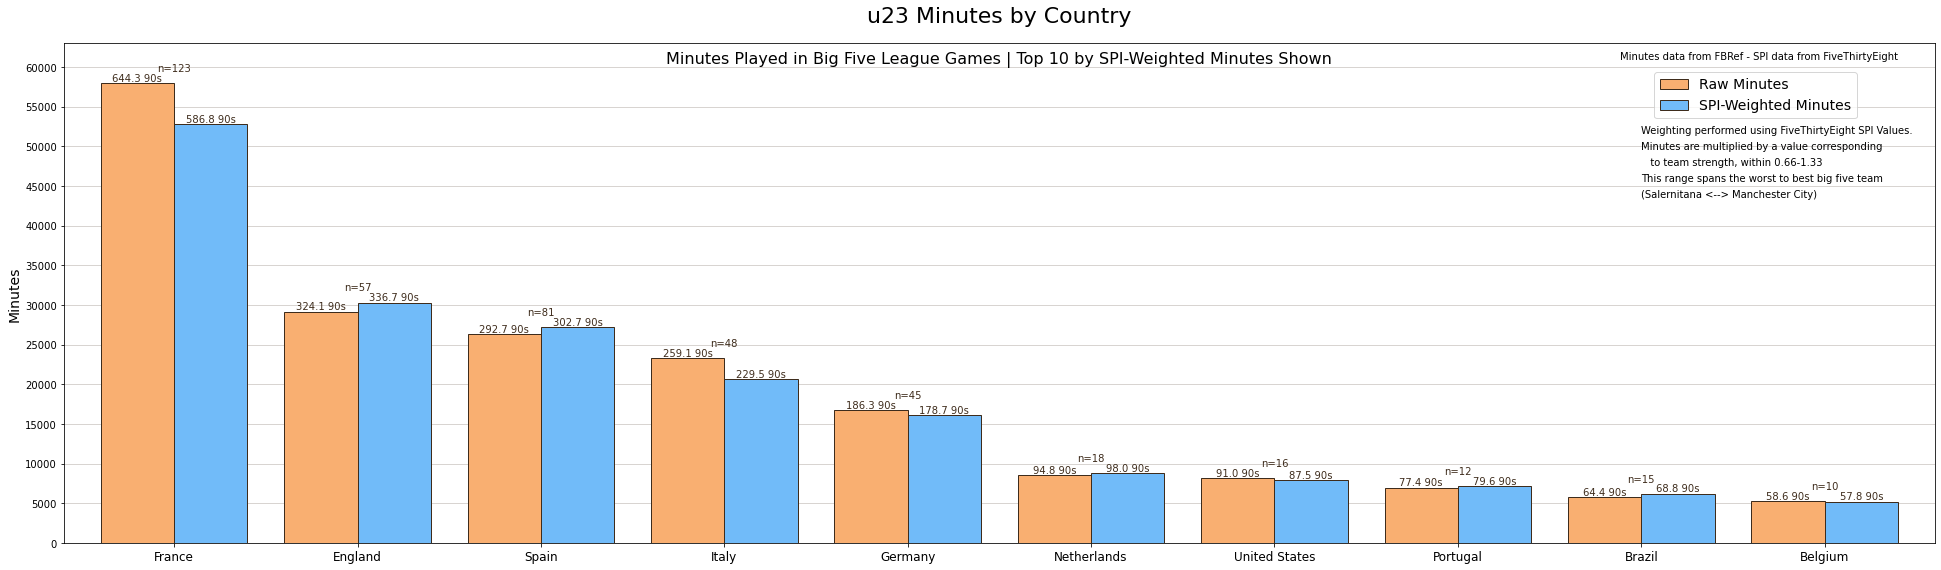

In [536]:
# plot both in same graph
#top_n = len(big5_u23['NationAbbrev'].unique())-5
top_n = 10

fill_color = '#F9AF71'
edge_color = '#3E2C1C'

big5_u23_grouped_sorted = big5_u23.groupby('NationAbbrev').sum().sort_values(by='Min_SPI', ascending=False)

raw_mins_h = big5_u23_grouped_sorted['Minutes'][:top_n]
spi_mins_h = big5_u23_grouped_sorted['Min_SPI'][:top_n]
nations = list(big5_u23_grouped_sorted.index[:top_n])
for i in range(len(nations)):
    nations[i] = country_names[nations[i]]
width = 1
x = np.array(range(1,top_n+1))*(width*2.5)
left_x = x-(width/2)
right_x = x+(width/2)

plt.figure(figsize=(top_n*2.75,8))
plt.grid(axis='y', alpha=0.25, color=edge_color, zorder=0)
plt.bar(x=left_x, height=raw_mins_h, edgecolor=edge_color, color=l_fill_color, width=width, zorder=3, label='Raw Minutes')
plt.bar(x=right_x, height=spi_mins_h, edgecolor=edge_color, color=r_fill_color, width=width, zorder=3, label='SPI-Weighted Minutes')
plt.xticks(ticks=x, labels=nations, fontsize=12)
plt.yticks(ticks=list(range(0,big5_u23_grouped_sorted['Minutes'].max()+5000,5000)))
plt.ylim((0,big5_u23_grouped_sorted['Minutes'].max()+5000))
plt.xlim((left_x[0]-width, right_x[len(right_x)-1]+width))

for i in range(top_n):
    nation = big5_u23_grouped_sorted.index[i]
    n = len(big5_u23[big5_u23['NationAbbrev'] == nation])
    plt.text(x=x[i], y=max(raw_mins_h[i],spi_mins_h[i])+1500, s=f"n={n}", horizontalalignment='center', color=edge_color, zorder=3)
    plt.text(x=left_x[i], y=raw_mins_h[i]+250, s=f"{round(raw_mins_h[i]/90,1)} 90s", horizontalalignment='center', color=edge_color, zorder=3)
    plt.text(x=right_x[i], y=spi_mins_h[i]+250, s=f"{round(spi_mins_h[i]/90,1)} 90s", horizontalalignment='center', color=edge_color, zorder=3)

plt.ylabel('Minutes', fontsize=14)

plt.legend(fontsize=14, loc=(.85,.85))

# Include some notes underneath the legend to explain the weighting a bit
fs=10
x_=x[len(x)-2]
y_=52000
y_delta=2000
halign = 'left'
plt.text(x=x_, y=y_, s="Weighting performed using FiveThirtyEight SPI Values.", fontsize=fs, horizontalalignment=halign, verticalalignment='center')
plt.text(x=x_, y=y_-y_delta, s="Minutes are multiplied by a value corresponding", fontsize=fs, horizontalalignment=halign, verticalalignment='center')
plt.text(x=x_, y=y_-y_delta*2, s="   to team strength, within 0.66-1.33", fontsize=fs, horizontalalignment=halign, verticalalignment='center')
plt.text(x=x_, y=y_-y_delta*3, s="This range spans the worst to best big five team", fontsize=fs, horizontalalignment=halign, verticalalignment='center')
plt.text(x=x_, y=y_-y_delta*4, s="(Salernitana <--> Manchester City)", fontsize=fs, horizontalalignment=halign, verticalalignment='center')

plt.text(x=x[len(x)-1]+width, y=61000, s='Minutes data from FBRef - SPI data from FiveThirtyEight', fontsize=10, horizontalalignment='right')

plt.title('u23 Minutes by Country', color='black', fontsize=22,y=1.03)
plt.text(x=x.mean(), y=60500, s='Minutes Played in Big Five League Games | Top 10 by SPI-Weighted Minutes Shown',
         color='black', fontsize=16, horizontalalignment='center')
    
plt.tight_layout()
plt.savefig('u23_Big5_Mins.png', dpi=250)


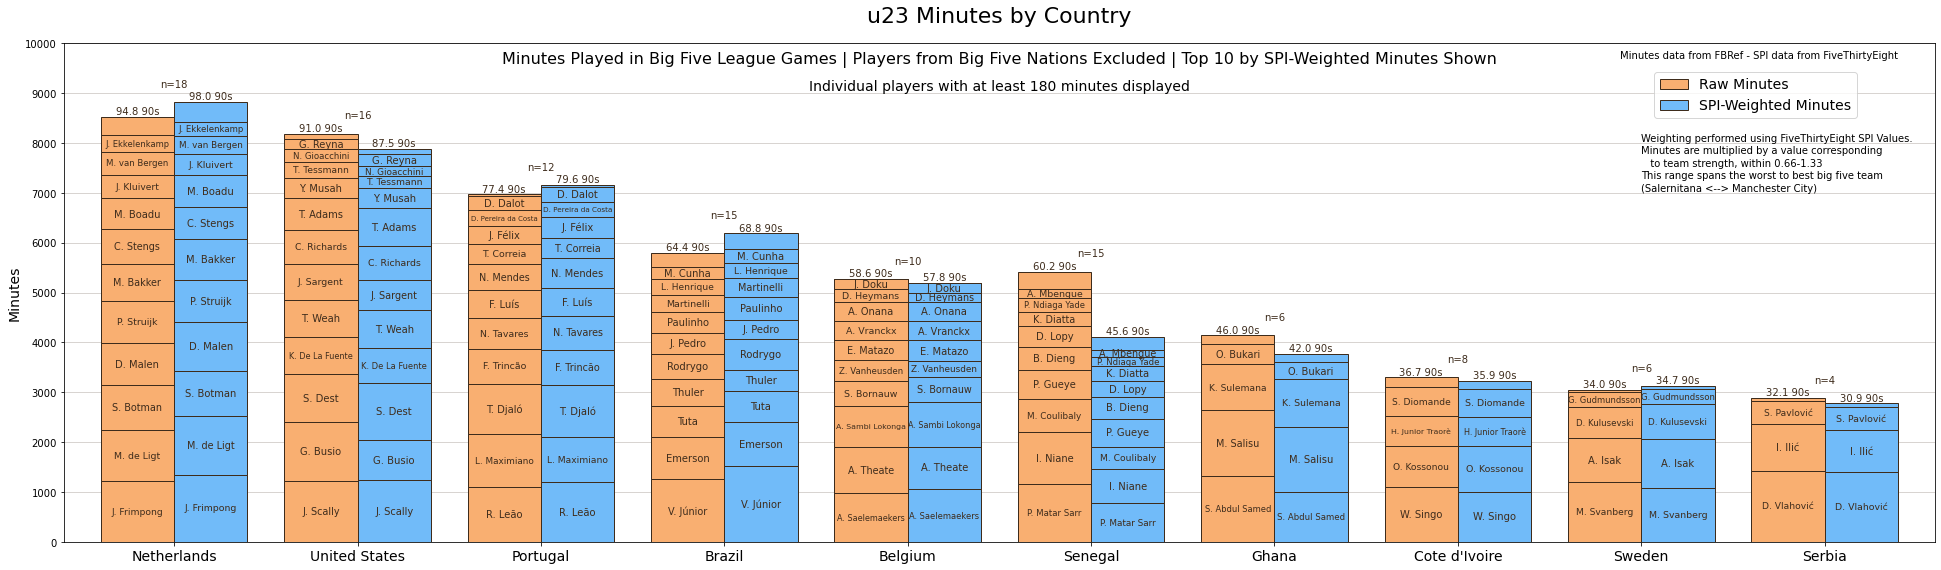

In [560]:
# plot both in same graph
#top_n = len(big5_u23['NationAbbrev'].unique())-5
top_n = 10

fill_color = '#F9AF71'
edge_color = '#3E2C1C'

# Exclude the players from the countries of the big five leagues
# .isin() is more pythonic, but this works for now (use .isin if more countries are added)
big5_u23_nobig5 = big5_u23[(big5_u23['NationAbbrev'] != 'ENG') & (big5_u23['NationAbbrev'] != 'FRA') & (big5_u23['NationAbbrev'] != 'ESP') & \
                           (big5_u23['NationAbbrev'] != 'ITA') & (big5_u23['NationAbbrev'] != 'GER')]

# Group by nation to get the sum of minutes for the main bars, and sort so plot is descending
big5_u23_nobig5_sorted = big5_u23_nobig5.groupby('NationAbbrev').sum().sort_values(by='Min_SPI', ascending=False)

raw_mins_h = big5_u23_nobig5_sorted['Minutes'][:top_n] # seperate height for left and right bar
spi_mins_h = big5_u23_nobig5_sorted['Min_SPI'][:top_n]
nations = list(big5_u23_nobig5_sorted.index[:top_n])
for i in range(len(nations)):
    nations[i] = country_names[nations[i]] # convert the abbreviations to full country names
width = 1
x = np.array(range(1,top_n+1))*(width*2.5)
left_x = x-(width/2)
right_x = x+(width/2)

plt.figure(figsize=(top_n*2.75,8))
plt.grid(axis='y', alpha=0.25, color=edge_color, zorder=0)
plt.bar(x=left_x, height=raw_mins_h, edgecolor=edge_color, color=l_fill_color, width=width, zorder=3, label='Raw Minutes')
plt.bar(x=right_x, height=spi_mins_h, edgecolor=edge_color, color=r_fill_color, width=width, zorder=3, label='SPI-Weighted Minutes')
plt.xticks(ticks=x, labels=nations, fontsize=14)
plt.yticks(ticks=[0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000])
plt.ylim((0,10000))
plt.xlim((left_x[0]-width, right_x[len(right_x)-1]+width))

for i in range(top_n): # Put the 90s number on top of every bar
    nation = big5_u23_nobig5_sorted.index[i]
    n = len(big5_u23[big5_u23['NationAbbrev'] == nation])
    plt.text(x=x[i], y=max(raw_mins_h[i],spi_mins_h[i])+300, s=f"n={n}", horizontalalignment='center', color=edge_color, zorder=3)
    plt.text(x=left_x[i], y=raw_mins_h[i]+50, s=f"{round(raw_mins_h[i]/90,1)} 90s", horizontalalignment='center', color=edge_color, zorder=3)
    plt.text(x=right_x[i], y=spi_mins_h[i]+50, s=f"{round(spi_mins_h[i]/90,1)} 90s", horizontalalignment='center', color=edge_color, zorder=3)

# Left bar values
for n in range(top_n): # include the player sections as overlapping bars
    nation = big5_u23_nobig5_sorted.index[n]
    nation_df = big5_u23[big5_u23['NationAbbrev'] == nation].sort_values(by='Minutes', ascending=True)
    ctr=0
    for p in nation_df.index:
        if (nation_df['Minutes'][p] < 180):
            ctr+=1
            continue
        plt.bar(x=[left_x[n]], height=nation_df['Minutes'].iloc[ctr:].sum(), color=l_fill_color, edgecolor=edge_color, width=width, zorder=3)
        if (' ' in nation_df['Player'][p]):
            name = nation_df['Player'][p].split(' ')[0][0] + '. ' + ' '.join(nation_df['Player'][p].split(' ')[1:])
        else: name = nation_df['Player'][p]
        name_y = (nation_df['Minutes'].iloc[ctr:].sum() + nation_df['Minutes'].iloc[ctr+1:].sum())/2
        fontsize = min(7 + ((0.8/3)*(-1*len(name)+19)), 10)
        plt.text(x=left_x[n], y=name_y, s=name, horizontalalignment='center', verticalalignment='center', color=edge_color, fontsize=fontsize, zorder=3, rotation=0)
        min_sum+=nation_df['Minutes'][p]
        ctr+=1

# Right bar values
for n in range(top_n):
    nation = big5_u23_nobig5_sorted.index[n]
    nation_df = big5_u23[big5_u23['NationAbbrev'] == nation].sort_values(by='Minutes', ascending=True)
    ctr=0
    for p in nation_df.index:
        if (nation_df['Minutes'][p] < 180):
            ctr+=1
            continue
        plt.bar(x=[right_x[n]], height=nation_df['Min_SPI'].iloc[ctr:].sum(), color=r_fill_color, edgecolor=edge_color, width=width, zorder=3)
        if (' ' in nation_df['Player'][p]):
            name = nation_df['Player'][p].split(' ')[0][0] + '. ' + ' '.join(nation_df['Player'][p].split(' ')[1:])
        else: name = nation_df['Player'][p]
        name_y = (nation_df['Min_SPI'].iloc[ctr:].sum() + nation_df['Min_SPI'].iloc[ctr+1:].sum())/2
        fontsize = min(7.25 + ((0.8/3)*(-1*len(name)+19)), 10)
        plt.text(x=right_x[n], y=name_y, s=name, horizontalalignment='center', verticalalignment='center', color=edge_color, fontsize=fontsize, zorder=3, rotation=0)
        min_sum+=nation_df['Min_SPI'][p]
        ctr+=1
        
plt.ylabel('Minutes', fontsize=14)

plt.legend(fontsize=14, loc=(.85,.85))

# Include some notes underneath the legend to explain the weighting a bit
fs=10
x_=x[len(x)-2]
y_=8100
y_delta=250
halign = 'left'
plt.text(x=x_, y=y_, s="Weighting performed using FiveThirtyEight SPI Values.", fontsize=fs, horizontalalignment=halign, verticalalignment='center')
plt.text(x=x_, y=y_-y_delta, s="Minutes are multiplied by a value corresponding", fontsize=fs, horizontalalignment=halign, verticalalignment='center')
plt.text(x=x_, y=y_-y_delta*2, s="   to team strength, within 0.66-1.33", fontsize=fs, horizontalalignment=halign, verticalalignment='center')
plt.text(x=x_, y=y_-y_delta*3, s="This range spans the worst to best big five team", fontsize=fs, horizontalalignment=halign, verticalalignment='center')
plt.text(x=x_, y=y_-y_delta*4, s="(Salernitana <--> Manchester City)", fontsize=fs, horizontalalignment=halign, verticalalignment='center')

plt.text(x=x[len(x)-1]+width, y=y_+1600, s='Minutes data from FBRef - SPI data from FiveThirtyEight', fontsize=10, horizontalalignment='right')

plt.title('u23 Minutes by Country', color='black', fontsize=22,y=1.03)
plt.text(x=x.mean(), y=9600, s='Minutes Played in Big Five League Games | Players from Big Five Nations Excluded | Top 10 by SPI-Weighted Minutes Shown',
         color='black', fontsize=16, horizontalalignment='center')
plt.text(x=x.mean(), y=9050, s='Individual players with at least 180 minutes displayed', color='black', fontsize=14, horizontalalignment='center')
    
plt.tight_layout()
plt.savefig('u23_noBig5_Big5_Mins.png', dpi=250)


## Now expand plot to top 40
#### It's gonna be really wide

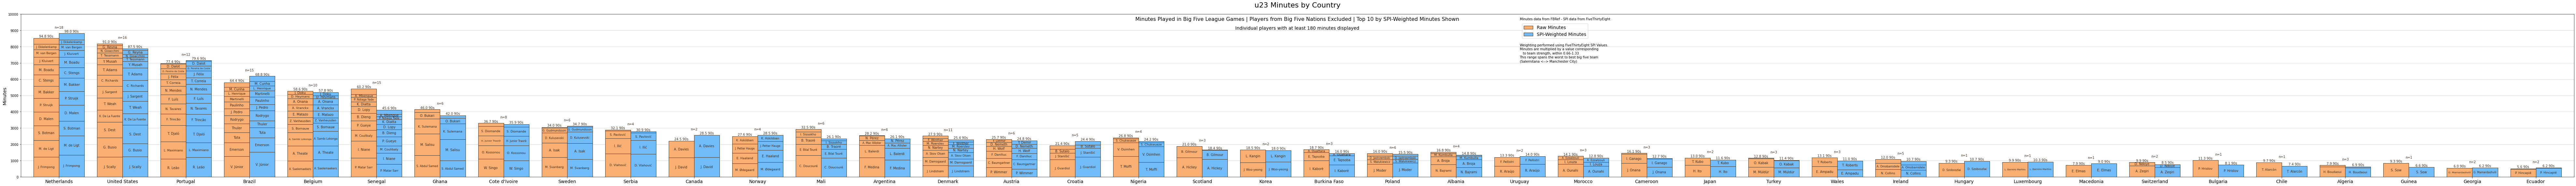

In [559]:
# plot both in same graph
#top_n = len(big5_u23['NationAbbrev'].unique())-5
top_n = 40 # plot gets wonky after 48, so lets do top 40

fill_color = '#F9AF71'
edge_color = '#3E2C1C'

big5_u23_nobig5 = big5_u23[(big5_u23['NationAbbrev'] != 'ENG') & (big5_u23['NationAbbrev'] != 'FRA') & (big5_u23['NationAbbrev'] != 'ESP') & \
                           (big5_u23['NationAbbrev'] != 'ITA') & (big5_u23['NationAbbrev'] != 'GER')]

big5_u23_nobig5_sorted = big5_u23_nobig5.groupby('NationAbbrev').sum().sort_values(by='Min_SPI', ascending=False)

raw_mins_h = big5_u23_nobig5_sorted['Minutes'][:top_n]
spi_mins_h = big5_u23_nobig5_sorted['Min_SPI'][:top_n]
nations = list(big5_u23_nobig5_sorted.index[:top_n])
for i in range(len(nations)):
    nations[i] = country_names[nations[i]]
width = 1
x = np.array(range(1,top_n+1))*(width*2.5)
left_x = x-(width/2)
right_x = x+(width/2)

plt.figure(figsize=(top_n*2.75,8))
plt.grid(axis='y', alpha=0.25, color=edge_color, zorder=0)
plt.bar(x=left_x, height=raw_mins_h, edgecolor=edge_color, color=l_fill_color, width=width, zorder=3, label='Raw Minutes')
plt.bar(x=right_x, height=spi_mins_h, edgecolor=edge_color, color=r_fill_color, width=width, zorder=3, label='SPI-Weighted Minutes')
plt.xticks(ticks=x, labels=nations, fontsize=14)
plt.yticks(ticks=[0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000])
plt.ylim((0,10000))
plt.xlim((left_x[0]-width, right_x[len(right_x)-1]+width))

for i in range(top_n):
    nation = big5_u23_nobig5_sorted.index[i]
    n = len(big5_u23[big5_u23['NationAbbrev'] == nation])
    plt.text(x=x[i], y=max(raw_mins_h[i],spi_mins_h[i])+300, s=f"n={n}", horizontalalignment='center', color=edge_color, zorder=3)
    plt.text(x=left_x[i], y=raw_mins_h[i]+50, s=f"{round(raw_mins_h[i]/90,1)} 90s", horizontalalignment='center', color=edge_color, zorder=3)
    plt.text(x=right_x[i], y=spi_mins_h[i]+50, s=f"{round(spi_mins_h[i]/90,1)} 90s", horizontalalignment='center', color=edge_color, zorder=3)

# Left bar values
for n in range(top_n):
    nation = big5_u23_nobig5_sorted.index[n]
    nation_df = big5_u23[big5_u23['NationAbbrev'] == nation].sort_values(by='Minutes', ascending=True)
    ctr=0
    for p in nation_df.index:
        if (nation_df['Minutes'][p] < 180):
            ctr+=1
            continue
        plt.bar(x=[left_x[n]], height=nation_df['Minutes'].iloc[ctr:].sum(), color=l_fill_color, edgecolor=edge_color, width=width, zorder=3)
        if (' ' in nation_df['Player'][p]):
            name = nation_df['Player'][p].split(' ')[0][0] + '. ' + ' '.join(nation_df['Player'][p].split(' ')[1:])
        else: name = nation_df['Player'][p]
        name_y = (nation_df['Minutes'].iloc[ctr:].sum() + nation_df['Minutes'].iloc[ctr+1:].sum())/2
        fontsize = min(7 + ((0.8/3)*(-1*len(name)+19)), 10)
        plt.text(x=left_x[n], y=name_y, s=name, horizontalalignment='center', verticalalignment='center', color=edge_color, fontsize=fontsize, zorder=3, rotation=0)
        min_sum+=nation_df['Minutes'][p]
        ctr+=1

# Right bar values
for n in range(top_n):
    nation = big5_u23_nobig5_sorted.index[n]
    nation_df = big5_u23[big5_u23['NationAbbrev'] == nation].sort_values(by='Minutes', ascending=True)
    ctr=0
    for p in nation_df.index:
        if (nation_df['Minutes'][p] < 180):
            ctr+=1
            continue
        plt.bar(x=[right_x[n]], height=nation_df['Min_SPI'].iloc[ctr:].sum(), color=r_fill_color, edgecolor=edge_color, width=width, zorder=3)
        if (' ' in nation_df['Player'][p]):
            name = nation_df['Player'][p].split(' ')[0][0] + '. ' + ' '.join(nation_df['Player'][p].split(' ')[1:])
        else: name = nation_df['Player'][p]
        name_y = (nation_df['Min_SPI'].iloc[ctr:].sum() + nation_df['Min_SPI'].iloc[ctr+1:].sum())/2
        fontsize = min(7.25 + ((0.8/3)*(-1*len(name)+19)), 10)
        plt.text(x=right_x[n], y=name_y, s=name, horizontalalignment='center', verticalalignment='center', color=edge_color, fontsize=fontsize, zorder=3, rotation=0)
        min_sum+=nation_df['Min_SPI'][p]
        ctr+=1
        
plt.ylabel('Minutes', fontsize=14)

plt.legend(fontsize=14, loc=(.588,.85))

fs=10
x_=x[int(len(x)/2)+3]
y_=8100
y_delta=250
halign = 'left'
plt.text(x=x_, y=y_, s="Weighting performed using FiveThirtyEight SPI Values.", fontsize=fs, horizontalalignment=halign, verticalalignment='center')
plt.text(x=x_, y=y_-y_delta, s="Minutes are multiplied by a value corresponding", fontsize=fs, horizontalalignment=halign, verticalalignment='center')
plt.text(x=x_, y=y_-y_delta*2, s="   to team strength, within 0.66-1.33", fontsize=fs, horizontalalignment=halign, verticalalignment='center')
plt.text(x=x_, y=y_-y_delta*3, s="This range spans the worst to best big five team", fontsize=fs, horizontalalignment=halign, verticalalignment='center')
plt.text(x=x_, y=y_-y_delta*4, s="(Salernitana <--> Manchester City)", fontsize=fs, horizontalalignment=halign, verticalalignment='center')

plt.text(x=x_, y=y_+1550, s='Minutes data from FBRef - SPI data from FiveThirtyEight', fontsize=10, horizontalalignment='left')

plt.title('u23 Minutes by Country', color='black', fontsize=22,y=1.03)
plt.text(x=x.mean(), y=9600, s='Minutes Played in Big Five League Games | Players from Big Five Nations Excluded | Top 10 by SPI-Weighted Minutes Shown',
         color='black', fontsize=16, horizontalalignment='center')
plt.text(x=x.mean(), y=9050, s='Individual players with at least 180 minutes displayed', color='black', fontsize=14, horizontalalignment='center')
    
plt.tight_layout()
plt.savefig('u23_noBig5_Big5_Mins_Top40.png', dpi=250)


## Big Five Nations included, but only domestic players excluded
#### Ex: Phil Foden(ENG, Man City) excluded. Jude Bellingham (ENG, Dortmund) included

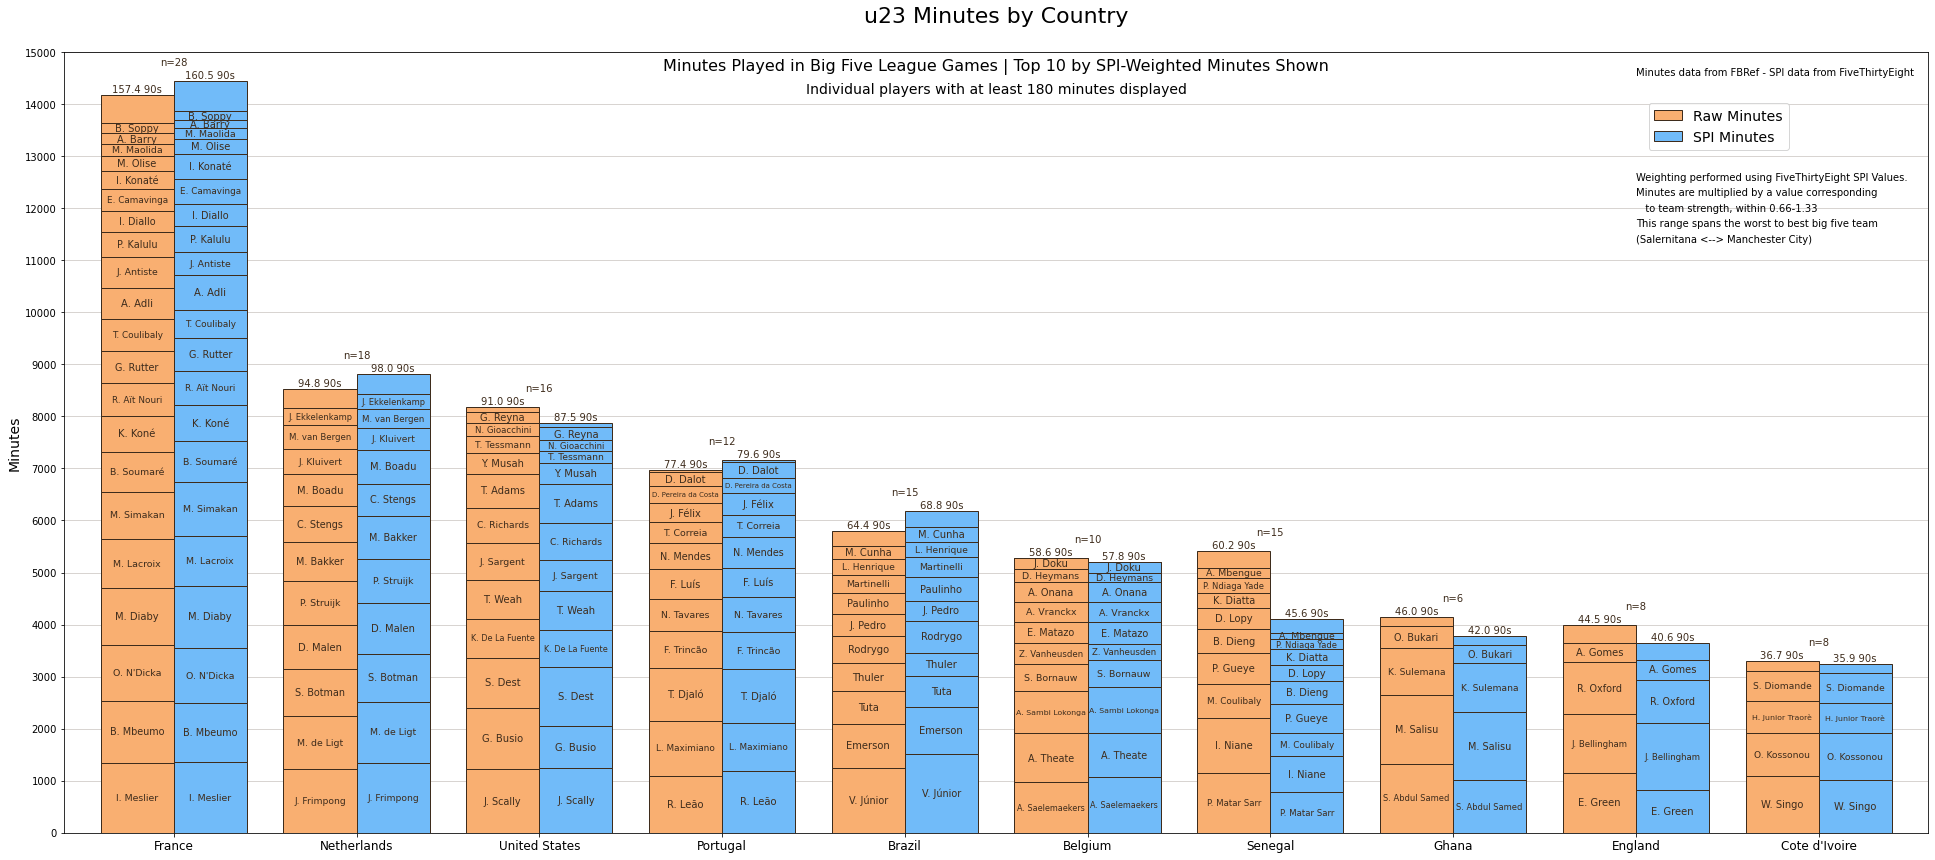

In [558]:
# plot both in same graph
#top_n = len(big5_u23['NationAbbrev'].unique())-5
top_n = 10

fill_color = '#F9AF71'
edge_color = '#3E2C1C'

big5_nations = ['ENG', 'FRA', 'ESP', 'ITA', 'GER']
to_drop = []
for i in big5_u23.index:
    if ((big5_u23['NationAbbrev'][i] == 'ENG') and (big5_u23['League'][i] == 'PremierLeague')): to_drop.append(i)
    elif ((big5_u23['NationAbbrev'][i] == 'FRA') and (big5_u23['League'][i] == 'Ligue1')): to_drop.append(i)
    elif ((big5_u23['NationAbbrev'][i] == 'GER') and (big5_u23['League'][i] == 'Bundesliga')): to_drop.append(i)
    elif ((big5_u23['NationAbbrev'][i] == 'ITA') and (big5_u23['League'][i] == 'SerieA')): to_drop.append(i)
    elif ((big5_u23['NationAbbrev'][i] == 'ESP') and (big5_u23['League'][i] == 'LaLiga')): to_drop.append(i)

big5_u23_big5exp = big5_u23.drop(index=to_drop)

big5_u23_big5exp_sorted = big5_u23_big5exp.groupby('NationAbbrev').sum().sort_values(by='Min_SPI', ascending=False)

raw_mins_h = big5_u23_big5exp_sorted['Minutes'][:top_n]
spi_mins_h = big5_u23_big5exp_sorted['Min_SPI'][:top_n]
nations = list(big5_u23_big5exp_sorted.index[:top_n])
for i in range(len(nations)):
    nations[i] = country_names[nations[i]]
width = 1
x = np.array(range(1,top_n+1))*(width*2.5)
left_x = x-(width/2)
right_x = x+(width/2)

plt.figure(figsize=(top_n*2.75,8*1.5))
plt.grid(axis='y', alpha=0.25, color=edge_color, zorder=0)
plt.bar(x=left_x, height=raw_mins_h, edgecolor=edge_color, color=l_fill_color, width=width, zorder=3, label='Raw Minutes')
plt.bar(x=right_x, height=spi_mins_h, edgecolor=edge_color, color=r_fill_color, width=width, zorder=3, label='SPI Minutes')
plt.xticks(ticks=x, labels=nations, fontsize=12)
plt.yticks(ticks=[0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000])
plt.ylim((0,15000))
plt.xlim((left_x[0]-width, right_x[len(right_x)-1]+width))

for i in range(top_n):
    nation = big5_u23_big5exp_sorted.index[i]
    n = len(big5_u23_big5exp[big5_u23_big5exp['NationAbbrev'] == nation])
    plt.text(x=x[i], y=max(raw_mins_h[i],spi_mins_h[i])+300, s=f"n={n}", horizontalalignment='center', color=edge_color, zorder=3)
    plt.text(x=left_x[i], y=raw_mins_h[i]+50, s=f"{round(raw_mins_h[i]/90,1)} 90s", horizontalalignment='center', color=edge_color, zorder=3)
    plt.text(x=right_x[i], y=spi_mins_h[i]+50, s=f"{round(spi_mins_h[i]/90,1)} 90s", horizontalalignment='center', color=edge_color, zorder=3)

# Left bar values
for n in range(top_n):
    nation = big5_u23_big5exp_sorted.index[n]
    nation_df = big5_u23_big5exp[big5_u23_big5exp['NationAbbrev'] == nation].sort_values(by='Minutes', ascending=True)
    ctr=0
    for p in nation_df.index:
        if (nation_df['Minutes'][p] < 180):
            ctr+=1
            continue
        plt.bar(x=[left_x[n]], height=nation_df['Minutes'].iloc[ctr:].sum(), color=l_fill_color, edgecolor=edge_color, width=width, zorder=3)
        if (' ' in nation_df['Player'][p]):
            name = nation_df['Player'][p].split(' ')[0][0] + '. ' + ' '.join(nation_df['Player'][p].split(' ')[1:])
        else: name = nation_df['Player'][p]
        name_y = (nation_df['Minutes'].iloc[ctr:].sum() + nation_df['Minutes'].iloc[ctr+1:].sum())/2
        fontsize = min(7 + ((0.8/3)*(-1*len(name)+19)), 10)
        plt.text(x=left_x[n], y=name_y, s=name, horizontalalignment='center', verticalalignment='center', color=edge_color, fontsize=fontsize, zorder=3, rotation=0)
        min_sum+=nation_df['Minutes'][p]
        ctr+=1

# Right bar values
for n in range(top_n):
    nation = big5_u23_big5exp_sorted.index[n]
    nation_df = big5_u23_big5exp[big5_u23_big5exp['NationAbbrev'] == nation].sort_values(by='Minutes', ascending=True)
    ctr=0
    for p in nation_df.index:
        if (nation_df['Minutes'][p] < 180):
            ctr+=1
            continue
        plt.bar(x=[right_x[n]], height=nation_df['Min_SPI'].iloc[ctr:].sum(), color=r_fill_color, edgecolor=edge_color, width=width, zorder=3)
        if (' ' in nation_df['Player'][p]):
            name = nation_df['Player'][p].split(' ')[0][0] + '. ' + ' '.join(nation_df['Player'][p].split(' ')[1:])
        else: name = nation_df['Player'][p]
        name_y = (nation_df['Min_SPI'].iloc[ctr:].sum() + nation_df['Min_SPI'].iloc[ctr+1:].sum())/2
        fontsize = min(7 + ((0.8/3)*(-1*len(name)+19)), 10)
        plt.text(x=right_x[n], y=name_y, s=name, horizontalalignment='center', verticalalignment='center', color=edge_color, fontsize=fontsize, zorder=3, rotation=0)
        min_sum+=nation_df['Min_SPI'][p]
        ctr+=1
        
plt.ylabel('Minutes', fontsize=14)

plt.legend(fontsize=14, loc=(.85,.875))

fs=10
x_=x[len(x)-2]
y_=12600
y_delta=300
halign = 'left'
plt.text(x=x_, y=y_, s="Weighting performed using FiveThirtyEight SPI Values.", fontsize=fs, horizontalalignment=halign, verticalalignment='center')
plt.text(x=x_, y=y_-y_delta, s="Minutes are multiplied by a value corresponding", fontsize=fs, horizontalalignment=halign, verticalalignment='center')
plt.text(x=x_, y=y_-y_delta*2, s="   to team strength, within 0.66-1.33", fontsize=fs, horizontalalignment=halign, verticalalignment='center')
plt.text(x=x_, y=y_-y_delta*3, s="This range spans the worst to best big five team", fontsize=fs, horizontalalignment=halign, verticalalignment='center')
plt.text(x=x_, y=y_-y_delta*4, s="(Salernitana <--> Manchester City)", fontsize=fs, horizontalalignment=halign, verticalalignment='center')

plt.text(x=x_, y=y_+1950, s='Minutes data from FBRef - SPI data from FiveThirtyEight', fontsize=10, horizontalalignment='left')

plt.title('u23 Minutes by Country', color='black', fontsize=22,y=1.03)
plt.text(x=x.mean(), y=14650, s='Minutes Played in Big Five League Games | Top 10 by SPI-Weighted Minutes Shown',
         color='black', fontsize=16, horizontalalignment='center')
plt.text(x=x.mean(), y=14200, s='Individual players with at least 180 minutes displayed', color='black', fontsize=14, horizontalalignment='center')
    
plt.tight_layout()
plt.savefig('u23_Big5exp_Big5_Mins.png', dpi=250)


## CONMEBOL and CONCACAF Only

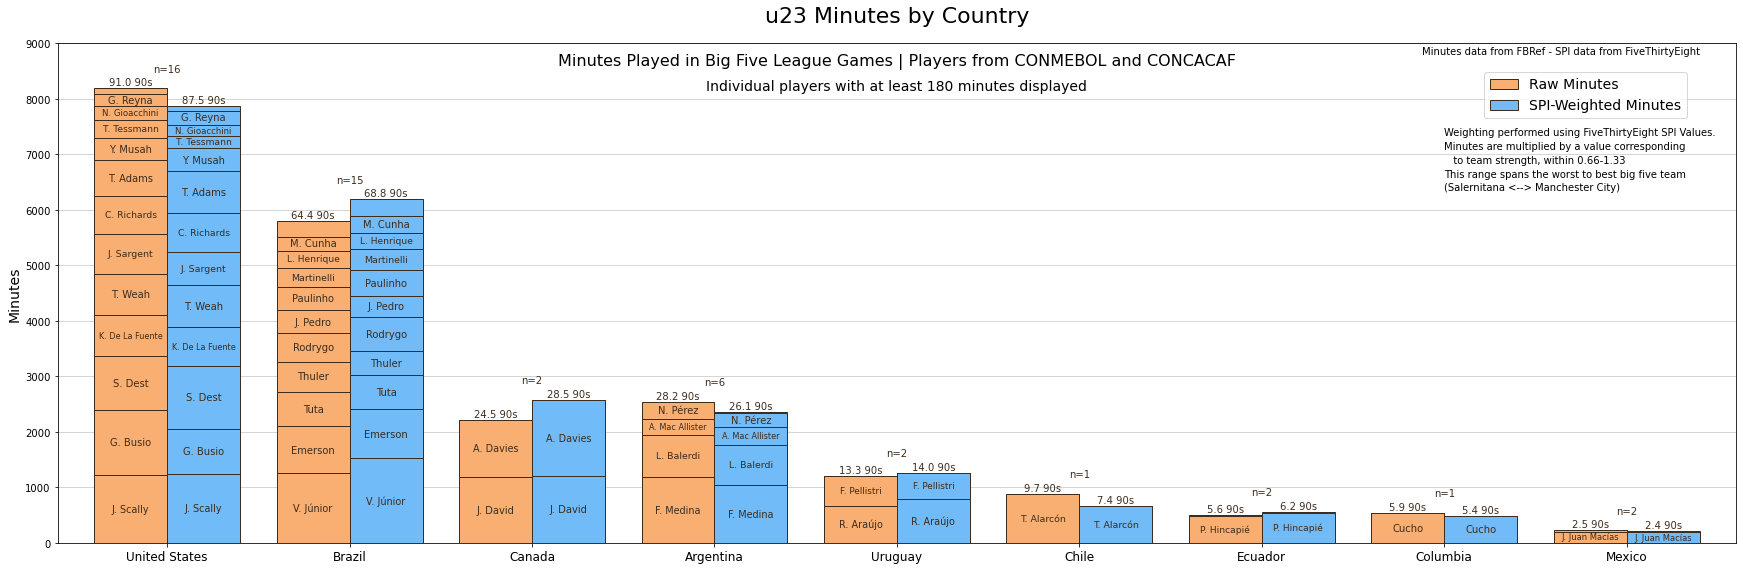

In [561]:
top_n = 9

r_fill_color = '#71BBF9'
l_fill_color = '#F9AF71'
edge_color = '#3E2C1C'

americas = ['USA', 'MEX', 'CAN', 'URU', 'BRA', 'ARG', 'ECU', 'COL', 'CHI']
big5_u23_americas = big5_u23[big5_u23['NationAbbrev'].isin(americas)]

big5_u23_americas_sorted = big5_u23_americas.groupby('NationAbbrev').sum().sort_values(by='Min_SPI', ascending=False)

raw_mins_h = big5_u23_americas_sorted['Minutes'][:top_n]
spi_mins_h = big5_u23_americas_sorted['Min_SPI'][:top_n]
nations = list(big5_u23_americas_sorted.index[:top_n])
for i in range(len(nations)):
    nations[i] = country_names[nations[i]]
width = 1
x = np.array(range(1,top_n+1))*(width*2.5)
left_x = x-(width/2)
right_x = x+(width/2)

plt.figure(figsize=(top_n*2.75,8))
plt.grid(axis='y', alpha=0.25, color=edge_color, zorder=0)
plt.bar(x=left_x, height=raw_mins_h, edgecolor=edge_color, color=l_fill_color, width=width, zorder=3, label='Raw Minutes')
plt.bar(x=right_x, height=spi_mins_h, edgecolor=edge_color, color=r_fill_color, width=width, zorder=3, label='SPI-Weighted Minutes')
plt.xticks(ticks=x, labels=nations, fontsize=12)
plt.yticks(ticks=[0,1000,2000,3000,4000,5000,6000,7000,8000,9000])
plt.ylim((0,9000))
plt.xlim((left_x[0]-width, right_x[len(right_x)-1]+width))

for i in range(top_n):
    nation = big5_u23_americas_sorted.index[i]
    n = len(big5_u23[big5_u23['NationAbbrev'] == nation])
    plt.text(x=x[i], y=max(raw_mins_h[i],spi_mins_h[i])+300, s=f"n={n}", horizontalalignment='center', color=edge_color, zorder=3)
    plt.text(x=left_x[i], y=raw_mins_h[i]+50, s=f"{round(raw_mins_h[i]/90,1)} 90s", horizontalalignment='center', color=edge_color, zorder=3)
    plt.text(x=right_x[i], y=spi_mins_h[i]+50, s=f"{round(spi_mins_h[i]/90,1)} 90s", horizontalalignment='center', color=edge_color, zorder=3)

# Left bar values
for n in range(top_n):
    nation = big5_u23_americas_sorted.index[n]
    nation_df = big5_u23[big5_u23['NationAbbrev'] == nation].sort_values(by='Minutes', ascending=True)
    ctr=0
    for p in nation_df.index:
        if (nation_df['Minutes'][p] < 180):
            ctr+=1
            continue
        plt.bar(x=[left_x[n]], height=nation_df['Minutes'].iloc[ctr:].sum(), color=l_fill_color, edgecolor=edge_color, width=width, zorder=3)
        if (' ' in nation_df['Player'][p]):
            name = nation_df['Player'][p].split(' ')[0][0] + '. ' + ' '.join(nation_df['Player'][p].split(' ')[1:])
        else: name = nation_df['Player'][p]
        name_y = (nation_df['Minutes'].iloc[ctr:].sum() + nation_df['Minutes'].iloc[ctr+1:].sum())/2
        fontsize = min(7 + ((0.8/3)*(-1*len(name)+19)), 10)
        plt.text(x=left_x[n], y=name_y, s=name, horizontalalignment='center', verticalalignment='center', color=edge_color, fontsize=fontsize, zorder=3, rotation=0)
        min_sum+=nation_df['Minutes'][p]
        ctr+=1

# Right bar values
for n in range(top_n):
    nation = big5_u23_americas_sorted.index[n]
    nation_df = big5_u23[big5_u23['NationAbbrev'] == nation].sort_values(by='Minutes', ascending=True)
    ctr=0
    for p in nation_df.index:
        if (nation_df['Minutes'][p] < 180):
            ctr+=1
            continue
        plt.bar(x=[right_x[n]], height=nation_df['Min_SPI'].iloc[ctr:].sum(), color=r_fill_color, edgecolor=edge_color, width=width, zorder=3)
        if (' ' in nation_df['Player'][p]):
            name = nation_df['Player'][p].split(' ')[0][0] + '. ' + ' '.join(nation_df['Player'][p].split(' ')[1:])
        else: name = nation_df['Player'][p]
        name_y = (nation_df['Min_SPI'].iloc[ctr:].sum() + nation_df['Min_SPI'].iloc[ctr+1:].sum())/2
        fontsize = min(7 + ((0.8/3)*(-1*len(name)+19)), 10)
        plt.text(x=right_x[n], y=name_y, s=name, horizontalalignment='center', verticalalignment='center', color=edge_color, fontsize=fontsize, zorder=3, rotation=0)
        min_sum+=nation_df['Min_SPI'][p]
        ctr+=1
        
plt.ylabel('Minutes', fontsize=14)

plt.legend(fontsize=14, loc=(.85,.85))

fs=10
x_=x[len(x)-2]
y_=7400
y_delta=250
halign = 'left'
plt.text(x=x_, y=y_, s="Weighting performed using FiveThirtyEight SPI Values.", fontsize=fs, horizontalalignment=halign, verticalalignment='center')
plt.text(x=x_, y=y_-y_delta, s="Minutes are multiplied by a value corresponding", fontsize=fs, horizontalalignment=halign, verticalalignment='center')
plt.text(x=x_, y=y_-y_delta*2, s="   to team strength, within 0.66-1.33", fontsize=fs, horizontalalignment=halign, verticalalignment='center')
plt.text(x=x_, y=y_-y_delta*3, s="This range spans the worst to best big five team", fontsize=fs, horizontalalignment=halign, verticalalignment='center')
plt.text(x=x_, y=y_-y_delta*4, s="(Salernitana <--> Manchester City)", fontsize=fs, horizontalalignment=halign, verticalalignment='center')

plt.text(x=x[len(x)-1]+width, y=y_+1400, s='Minutes data from FBRef - SPI data from FiveThirtyEight', fontsize=10, horizontalalignment='right')

plt.title('u23 Minutes by Country', color='black', fontsize=22,y=1.03)
plt.text(x=x.mean(), y=8600, s='Minutes Played in Big Five League Games | Players from CONMEBOL and CONCACAF',
         color='black', fontsize=16, horizontalalignment='center')
plt.text(x=x.mean(), y=8150, s='Individual players with at least 180 minutes displayed', color='black', fontsize=14, horizontalalignment='center')
    
plt.tight_layout()
plt.savefig('u23_Americas_Big5_Mins.png', dpi=250)

In [332]:
# Which of the Big 5 leagues is the best about playing their kids?
league_nation = [['PremierLeague', 'ENG'], ['LaLiga','ESP'], ['Ligue1','FRA'], ['SerieA','ITA'], ['Bundesliga', 'GER']]

domestic_u23 = pd.DataFrame(columns=['League','%_Total_Minutes'], index=range(len(league_nation)))
for i in range(len(league_nation)):
    total_league_mins = Mins_DF[Mins_DF['League'] == league_nation[i][0]]['Minutes'].sum()
    domestic_u23['League'][i] = league_nation[i][0]
    domestic_u23['%_Total_Minutes'][i] = (big5_u23.groupby(['League', 'NationAbbrev']).sum().loc[(league_nation[i][0],league_nation[i][1])]['Minutes'] / total_league_mins)*100
domestic_u23.sort_values(by='%_Total_Minutes', ascending=False)

,League,%_Total_Minutes
2,Ligue1,13.144191
0,PremierLeague,8.545302
1,LaLiga,8.009399
3,SerieA,7.182387
4,Bundesliga,5.920369


In [329]:
# Now which of the big five send their kids out to other big five leagues
# May be more reflective of the quality of league compared to others, not
#    necessarily how eager they are to send kids away for the sake of it

big5_domestic_exports = pd.DataFrame(data=league_nation, columns=['League','Nation'])
big5_domestic_exports[['Minutes', '90s', 'Minutes_adj', '90s_adj']] = np.nan
big5_domestic_exports

for i in range(len(big5_domestic_exports)):
    nation = big5_domestic_exports['Nation'][i]
    avoid_league = big5_domestic_exports['League'][i]
    big5_domestic_exports['Minutes'][i] = big5_u23[(big5_u23['NationAbbrev']==nation) & (big5_u23['League']!=avoid_league)]['Minutes'].sum()
    big5_domestic_exports['90s'][i] = big5_domestic_exports['Minutes'][i]/90
    big5_domestic_exports['Minutes_adj'][i] = big5_u23[(big5_u23['NationAbbrev']==nation) & (big5_u23['League']!=avoid_league)]['Min_SPI'].sum()
    big5_domestic_exports['90s_adj'][i] = big5_domestic_exports['Minutes_adj'][i]/90
big5_domestic_exports.sort_values(by='Minutes', ascending=False)

,League,Nation,Minutes,90s,Minutes_adj,90s_adj
2,Ligue1,FRA,14168.0,157.422222,14447.698113,160.529979
0,PremierLeague,ENG,4001.0,44.455556,3653.224790,40.591387
4,Bundesliga,GER,2014.0,22.377778,2055.231150,22.835902
1,LaLiga,ESP,1496.0,16.622222,1662.056250,18.467292
3,SerieA,ITA,631.0,7.011111,744.131722,8.268130
